## classifying hand witten digits with support vector machine

**PLAN:**

 -  read in data
 - train test split
 - cross validation to get an accuracy score for the following
  - linear svc
  - svm with polynomial kernal
  - svm with radial kernal
 - run on test data
 - do a matrix to find accuracy
 

In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = datasets.load_digits()

In [5]:
type(mnist)

sklearn.utils.Bunch

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
y = mnist.target
X = mnist.data

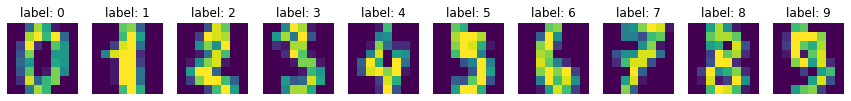

In [4]:
fig, axs = plt.subplots(1,10,figsize=(15,3))
for i in range(10):
    axs[i].imshow(mnist.images[i])
    axs[i].set_title(f'label: {y[i]}')
    axs[i].axis('off')

In [5]:
X.shape

(1797, 64)

In [4]:
X_train,X_test,y_train, y_test = train_test_split(X,y)

Text(0.5, 1.0, 'linearSVC : cross val scores on training set')

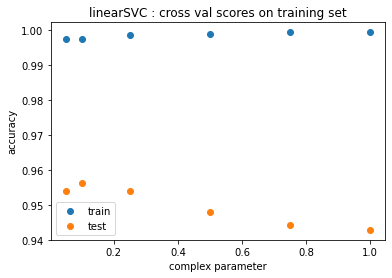

In [22]:
#lets toon the c hyperparamter to choose the right amount of complexity
c = [.05,.10,.25,.5,.75,1]
train_score = []
test_score = []
for i in c:

    linearSVC = svm.LinearSVC(multi_class='ovr', random_state=666,C=i,dual=False)
    scores = cross_validate(linearSVC,X_train,y_train,cv=5,return_train_score=True)
    train_score.append(np.average(scores['train_score']))
    test_score.append(np.average(scores['test_score']))

    

# plot
plt.scatter(c,train_score,label='train')
plt.scatter(c,test_score,label='test')
plt.xlabel('complex parameter')
plt.ylabel('accuracy')
plt.legend()
plt.title('linearSVC : cross val scores on training set')

Text(0.5, 1.0, 'polySVM : cross val scores on training set')

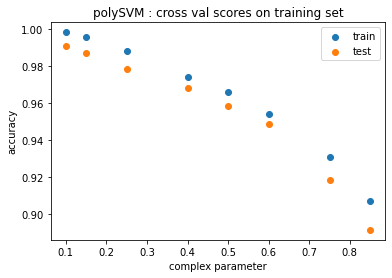

In [35]:
#polynoial SVM with nuSVM have the main paremeters:
#   nu : upper bound on the fraction of margin errors
#   kernal
#   degree
#   gamma
#
#  for this excersice i am going to leave them all as default except nu which i am going to tun with cross validation

n= [.10,.15,.25,.40,.5,.60,.75,.85]
train_score = []
test_score = []
for i in n:

    polySVM = svm.NuSVC(nu=i,kernel='poly', random_state=666,decision_function_shape='ovr')
    scores = cross_validate(polySVM,X_train,y_train,cv=5,return_train_score=True)
    train_score.append(np.average(scores['train_score']))
    test_score.append(np.average(scores['test_score']))

    

# plot
plt.scatter(n,train_score,label='train')
plt.scatter(n,test_score,label='test')
plt.xlabel('complex parameter')
plt.ylabel('accuracy')
plt.legend()
plt.title('polySVM : cross val scores on training set')

Text(0.5, 1.0, 'polySVM : cross val scores on training set')

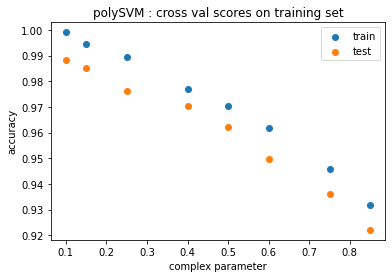

In [5]:
# now try radial
n= [.10,.15,.25,.40,.5,.60,.75,.85]
train_score = []
test_score = []
for i in n:

    radialSVM = svm.NuSVC(nu=i,kernel='rbf', random_state=666,decision_function_shape='ovr')
    scores = cross_validate( radialSVM ,X_train,y_train,cv=5,return_train_score=True)
    train_score.append(np.average(scores['train_score']))
    test_score.append(np.average(scores['test_score']))

    

# plot
plt.scatter(n,train_score,label='train')
plt.scatter(n,test_score,label='test')
plt.xlabel('complex parameter')
plt.ylabel('accuracy')
plt.legend()
plt.title(' radialSVM  : cross val scores on training set')

**Im going to go with polynomial fit since it looks like it has the best fits as good ar radial but its faster**

**I am choosing .4 for my fuzzy margin peramter (nu)  becasue its where the test accuracy is closest to train accuracy**

In [7]:
polySVM = svm.NuSVC(nu=.4,kernel='poly', random_state=666,decision_function_shape='ovr')
polySVM.fit(X_train,y_train)
prediction = polySVM.predict(X_test)



''

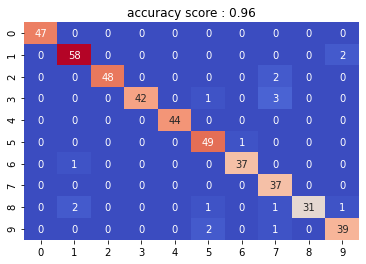

In [18]:
# smake matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np


accuracy = accuracy_score(y_test, prediction)
cf_matrix = confusion_matrix(y_test, prediction)

sns.heatmap(cf_matrix,annot=True,cbar=False,cmap="coolwarm")
plt.title(f'accuracy score : {accuracy}')
;